#### Import necessary libraries

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.metrics import classification_report
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from src.model import SoftmaxClassifier
from src.generate_classification_report import generate_classification_report
from utils.visualization import show_images
from src.data_processing import get_data_loaders
from src.train import train_model
from src.evaluation import evaluate_model




In [4]:
# Set up data loaders
train_loader, val_loader, test_loader = get_data_loaders()


Files already downloaded and verified


 #### Prints the shape of the images, and displays them in a 16x8 grid using matplotlib

images.shape: torch.Size([64, 3, 32, 32])


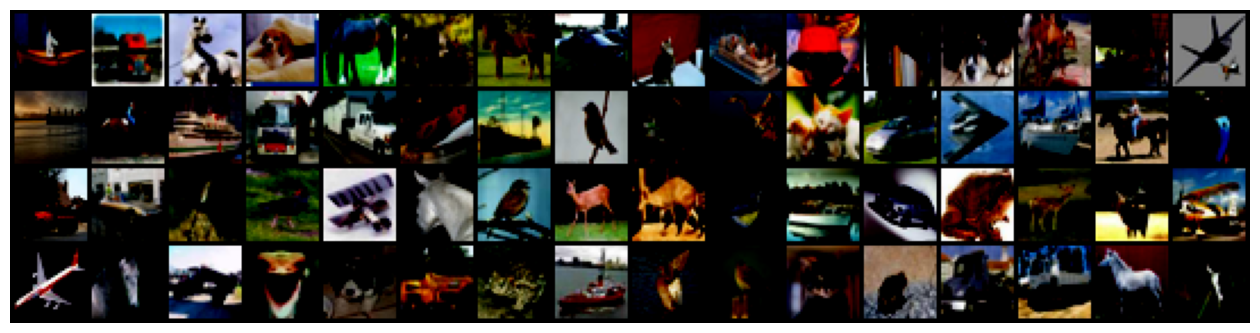

In [5]:
for images, _ in train_loader:
  show_images(images)
  break

#### Define Softmax Classifier

In [6]:
# Define Softmax Classifier
n_input = 32 * 32 * 3  # CIFAR10 images have a size of 32x32 pixels and 3 channels (RGB)
n_output = 10  # Number of CIFAR10 classes
model = SoftmaxClassifier(n_input, n_output)

# Train the model
model, training_losses = train_model(model, train_loader)

Epoch 10/200, Loss: 1.774655403559125
Epoch 20/200, Loss: 1.7322064616344528
Epoch 30/200, Loss: 1.7094720192321693
Epoch 40/200, Loss: 1.693761950437068
Epoch 50/200, Loss: 1.681647313796188
Epoch 60/200, Loss: 1.6717704870147287
Epoch 70/200, Loss: 1.6638411684489556
Epoch 80/200, Loss: 1.6567520829397755
Epoch 90/200, Loss: 1.6506812178020722
Epoch 100/200, Loss: 1.6453899502536278
Epoch 110/200, Loss: 1.6401708867039932
Epoch 120/200, Loss: 1.6357339688149406
Epoch 130/200, Loss: 1.631556526616461
Epoch 140/200, Loss: 1.627731296872308
Epoch 150/200, Loss: 1.6243863199485067
Epoch 160/200, Loss: 1.620803199258975
Epoch 170/200, Loss: 1.6177151477750955
Epoch 180/200, Loss: 1.61496058961809
Epoch 190/200, Loss: 1.6120674764870289
Epoch 200/200, Loss: 1.6092561424541298


#### Define function to evaluate the accuracy of a PyTorch model on a given DataLoader using the specified input size

In [7]:
# Evaluate the model
accuracy_val = evaluate_model(model, val_loader, n_input)
print(f'Validation Accuracy: {accuracy_val * 100:.2f}%')

# Evaluate on the test set
test_accuracy = evaluate_model(model, test_loader, n_input)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate classification report
classification_report_test = generate_classification_report(model, test_loader, n_input)
print("\nClassification Report:")
print(classification_report_test)


Validation Accuracy: 41.93%
Test Accuracy: 40.44%

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       491
           1       0.45      0.49      0.47       493
           2       0.29      0.27      0.28       487
           3       0.26      0.23      0.24       514
           4       0.37      0.27      0.31       502
           5       0.36      0.31      0.34       519
           6       0.40      0.49      0.44       510
           7       0.44      0.46      0.45       479
           8       0.48      0.53      0.50       489
           9       0.45      0.48      0.47       516

    accuracy                           0.40      5000
   macro avg       0.40      0.41      0.40      5000
weighted avg       0.40      0.40      0.40      5000

